Logistic Regression for Bank Dataset

In [ ]:
from google.colab import files
upload=files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("bank-full.csv",sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["job"]=LE.fit_transform(df["job"])
df["marital"]=LE.fit_transform(df["marital"])
df["education"]=LE.fit_transform(df["education"])
df["default"]=LE.fit_transform(df["default"])
df["housing"]=LE.fit_transform(df["housing"])
df["loan"]=LE.fit_transform(df["loan"])
df["contact"]=LE.fit_transform(df["contact"])
df["month"]=LE.fit_transform(df["month"])
df["poutcome"]=LE.fit_transform(df["poutcome"])
df["y"]=LE.fit_transform(df["y"])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [ ]:
len(list(df))

17

In [ ]:
X=df.iloc[:,0:16]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [ ]:
Y=df["y"]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)






In [24]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
Y_pred_train=LR.predict(X_train)
Y_pred_test=LR.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [27]:
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score Training Data:",ac1.round(3))
print("Accuracy Score Training Data:",ac2.round(3))

Accuracy Score Training Data: 0.887
Accuracy Score Training Data: 0.885


In [28]:
PS1=precision_score(Y_train,Y_pred_train)
PS2=precision_score(Y_test,Y_pred_test)
print("Precision Score Training Data:",PS1.round(3))
print("Precision Score Testing Data:",PS2.round(3))

Precision Score Training Data: 0.553
Precision Score Testing Data: 0.539


In [30]:
f1=f1_score(Y_train,Y_pred_train)
f2=f1_score(Y_test,Y_pred_test)
print("Recall Score Training Data:",f1.round(3))
print("Recall Score Training Data:",f2.round(3))

Recall Score Training Data: 0.281
Recall Score Training Data: 0.264


In [31]:
LR.predict(X)
Y_probabilities=LR.predict_proba(X)[:,1]
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,NA=roc_curve(Y,Y_probabilities)


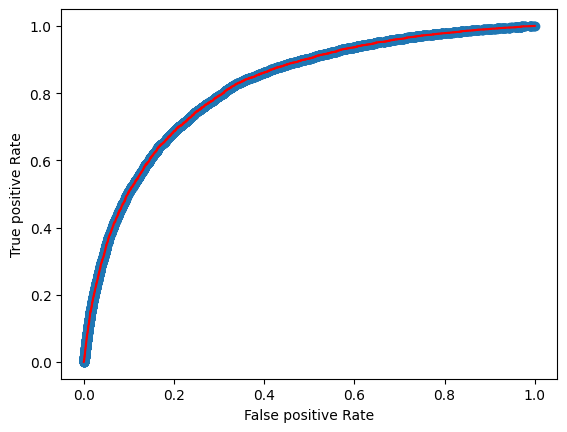

who age subscribed a team deposit under curve score: 0.82


In [33]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color="red")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()
print("who age subscribed a team deposit under curve score:",roc_auc_score(Y,Y_probabilities).round(3))